<a href="https://colab.research.google.com/github/Somesh140/ANN/blob/main/cv/CNN_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"
import os
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def read_img(path, grayscale=True):
  img=cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap="gray")
    return img
  try:
    cv2.imshow("display",img) # This works on local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow #This works on your colab
    cv2_imshow(img)
    return img 

In [4]:
img_path="car1.jpeg"

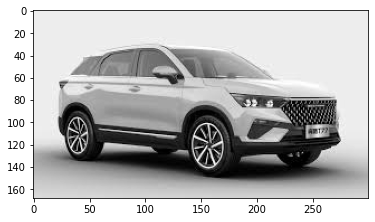

In [6]:
car=read_img(path =img_path, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



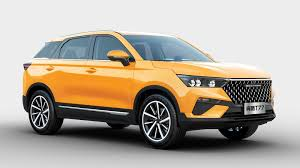

In [7]:
color_car = read_img(path=img_path,grayscale=False)

In [8]:
car.shape

(168, 300)

In [9]:
color_car.shape

(168, 300, 3)

Apply single convolutional layer

In [11]:
row,col = car.shape
batch=1 # single image is there
ch=1 # grayscale
reshaped_car_img = car.reshape(batch,row,col,ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [19]:
input_shape=reshaped_car_img.shape[1:]
CONV_LAYERS=[ 
    tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),strides=(1,1),input_shape=input_shape)
]
conv_model = tf.keras.Sequential(CONV_LAYERS)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [20]:
out= conv_model.predict(reshaped_car_img)

In [14]:
out.shape

(1, 166, 298, 1)

In [15]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [21]:
reshape_out=out.reshape(row,col)

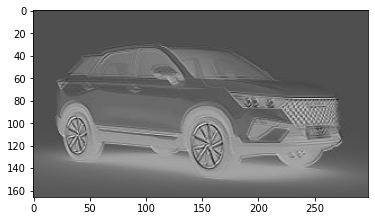

In [22]:
plt.imshow(reshape_out,cmap="gray")

For color images

In [23]:
#(1,r,c,ch)
row,col,ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row,col,ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [30]:
input_shape = color_car_reshaped.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [31]:
out = conv_model.predict(color_car_reshaped)

In [32]:
out.shape

(1, 166, 298, 1)

In [33]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [34]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

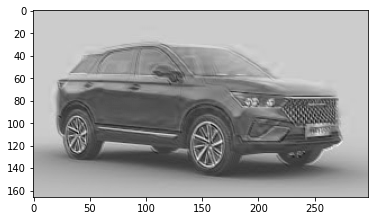

In [35]:
plt.imshow(reshape_out, cmap="gray")

In [36]:
def reshaping_in(img,grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) #grayscale
    return img
  row,col,ch = img.shape
  color_img = img.reshape(1,row,col,ch)
  return color_img  

In [38]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None,padding='valid'):
  
  CONV_LAYER = [
    
      tf.keras.layers.Conv2D(
          filters=filters, 
          kernel_size=kernel_size, 
          strides=strides, 
          input_shape=input_shape,
          padding=padding)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [44]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



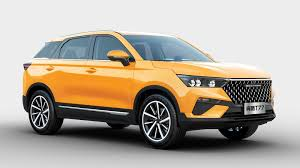

(1, 168, 300, 3)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


(1, 166, 298, 1)


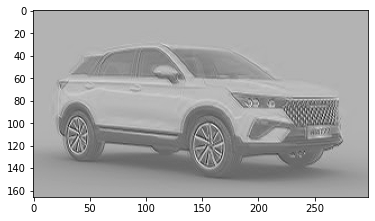

In [46]:
#read image file and convert to array
img = read_img(img_path,grayscale=False)
#reshape the array
input_img = reshaping_in(img=img,grayscale=False)
print(input_img.shape)
#get convolution model
model= get_conv_model(filters=1,
                      kernel_size=(3,3),
                      strides=(1,1),
                      input_shape=input_img.shape[1:],
                      padding="valid")

apply_conv_model_and_visualize(input_img,model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



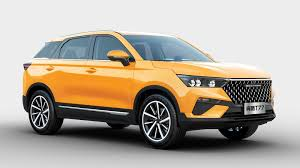

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


(1, 166, 298, 5)


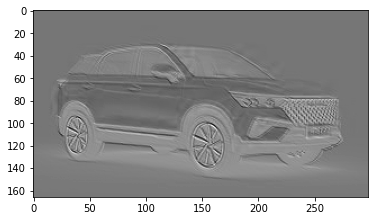

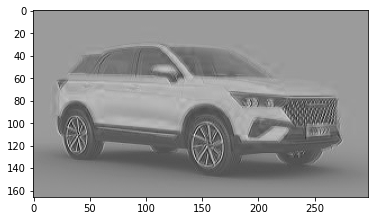

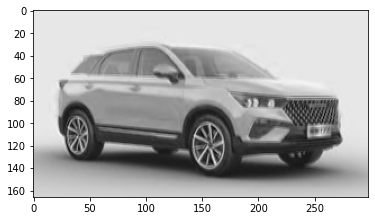

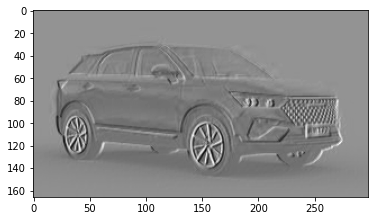

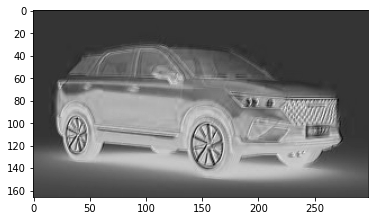

In [47]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5, # no of filters changed
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


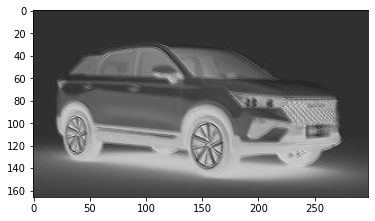

In [48]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 166, 298, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)


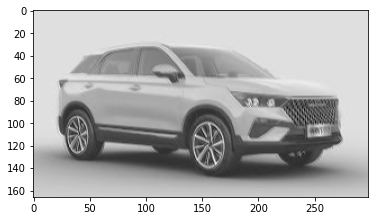

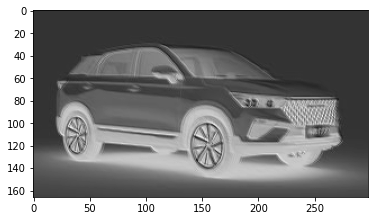

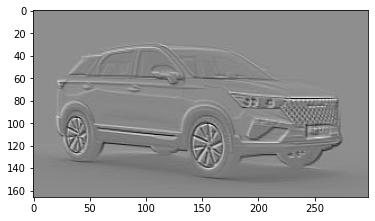

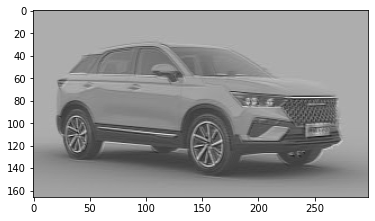

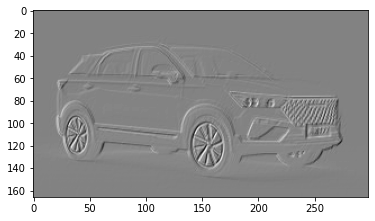

In [49]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



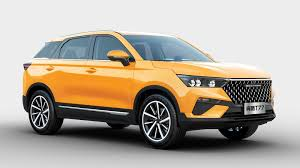

(1, 168, 300, 3)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 168, 300, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 168, 300, 1)


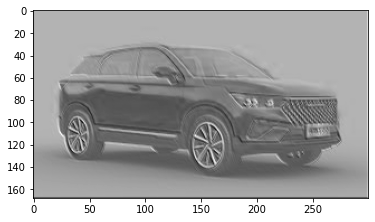

In [50]:
#read image file and convert to array
img = read_img(img_path,grayscale=False)
#reshape the array
input_img = reshaping_in(img=img,grayscale=False)
print(input_img.shape)
#get convolution model
model= get_conv_model(filters=1,
                      kernel_size=(3,3),
                      strides=(1,1),
                      input_shape=input_img.shape[1:],
                      padding="same")

apply_conv_model_and_visualize(input_img,model)

In [51]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, 
                                            strides=strides)
  
  result = pooling_layer(reshaped_img)
  return result

(168, 300)


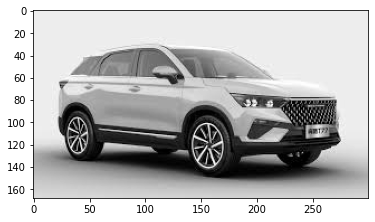

In [52]:
img = read_img(img_path)
print(img.shape)

In [53]:
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


In [54]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

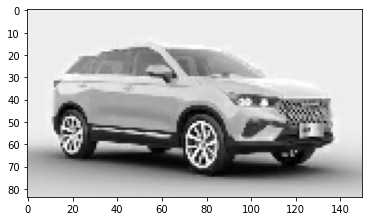

In [55]:
plot_pooling(result)

In [56]:
_, row, col, _ = result.shape

reshape = tf.reshape(result, (row, col))

In [57]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 42, 75, 1])

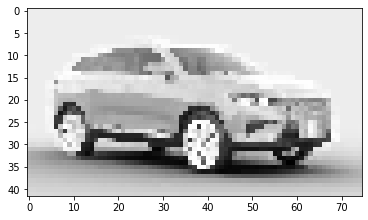

In [58]:
plot_pooling(result)